# Introduction to Synthetic Population Generation

In [1]:
from pathlib import Path

import pandas as pd

from caveat.data.synth import ActivityGen
from caveat.data.utils import generate_population, trace_to_pam
from caveat.features.sequence import sequence_prob_plot
from caveat.features.times import (
    joint_time_distributions_plot,
    times_distributions_plot,
)

In [2]:
write_path = Path("tmp/synthetic_population.csv")

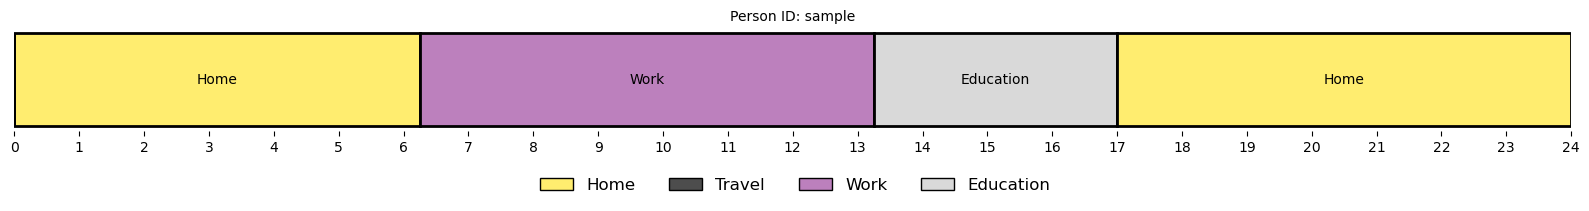

In [3]:
# Example
generator = ActivityGen()
generator.build()

trace = generator.run()
plan = trace_to_pam(trace, generator.map)
plan.plot()

In [4]:
population = generate_population(gen=generator, size=100)
population.act = population.act.map(generator.map)
population = population[["pid", "act", "start", "end", "duration"]]
population

,pid,act,start,end,duration
0,0,home,0,375,375
1,0,shop,375,390,15
2,0,work,390,900,510
3,0,shop,900,960,60
4,0,home,960,1275,315
...,...,...,...,...,...
510,99,home,0,390,390
511,99,shop,390,450,60
512,99,work,450,1035,585
513,99,education,1035,1080,45


In [5]:
write_path.parent.mkdir(exist_ok=True)
population.to_csv(write_path, index=False)

In [6]:
def describe_col(population, col: str) -> pd.DataFrame:
    description = population.groupby("act")[col].describe()[
        ["count", "mean", "std", "min", "max"]
    ]
    description["attribute"] = col
    return description


def describe_cols(population, cols: list[str]) -> pd.DataFrame:
    description = pd.concat(
        [describe_col(population, c) for c in cols], ignore_index=False
    )
    description = description.reset_index().set_index(["attribute", "act"])
    return description


describe_cols(population, ["start", "end", "duration"]).round()

count   mean    std    min     max
attribute act                                          
start     education   46.0  867.0  191.0  405.0  1065.0
          home       215.0  555.0  524.0    0.0  1320.0
          leisure     64.0  869.0  263.0  375.0  1275.0
          shop        89.0  607.0  282.0  375.0  1185.0
          work       101.0  424.0   60.0  375.0   825.0
end       education   46.0  974.0  174.0  495.0  1080.0
          home       215.0  926.0  513.0  375.0  1440.0
          leisure     64.0  934.0  273.0  405.0  1320.0
          shop        89.0  643.0  281.0  390.0  1200.0
          work       101.0  939.0   79.0  765.0  1200.0
duration  education   46.0  106.0   45.0   15.0   210.0
          home       215.0  371.0   76.0   15.0   480.0
          leisure     64.0   65.0   24.0   15.0   150.0
          shop        89.0   35.0   23.0   15.0   150.0
          work       101.0  515.0   71.0  375.0   645.0

In [7]:
def time_distributions(population: pd.DataFrame, mapping: dict):
    starts = {k: [] for k in mapping.values()}
    ends = {k: [] for k in mapping.values()}
    durations = {k: [] for k in mapping.values()}
    for act, acts in population.groupby("act"):
        starts[act] = list(acts.start)
        ends[act] = list(acts.end)
        durations[act] = list(acts.duration)
    return starts, ends, durations

In [8]:
starts, ends, durations = time_distributions(population, generator.map)

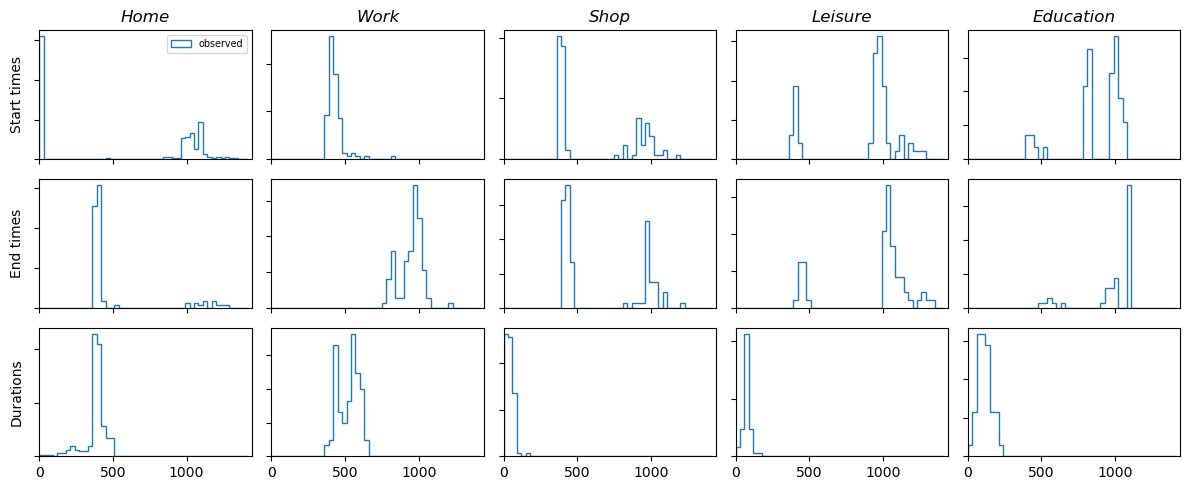

In [9]:
_ = times_distributions_plot(population, ys={})

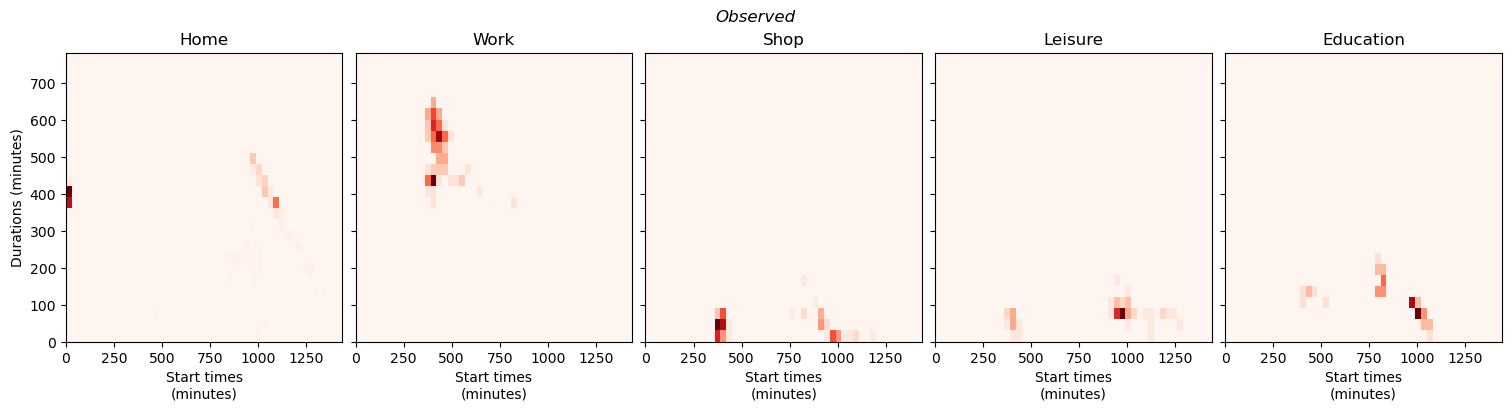

In [10]:
_ = joint_time_distributions_plot(population, ys={})

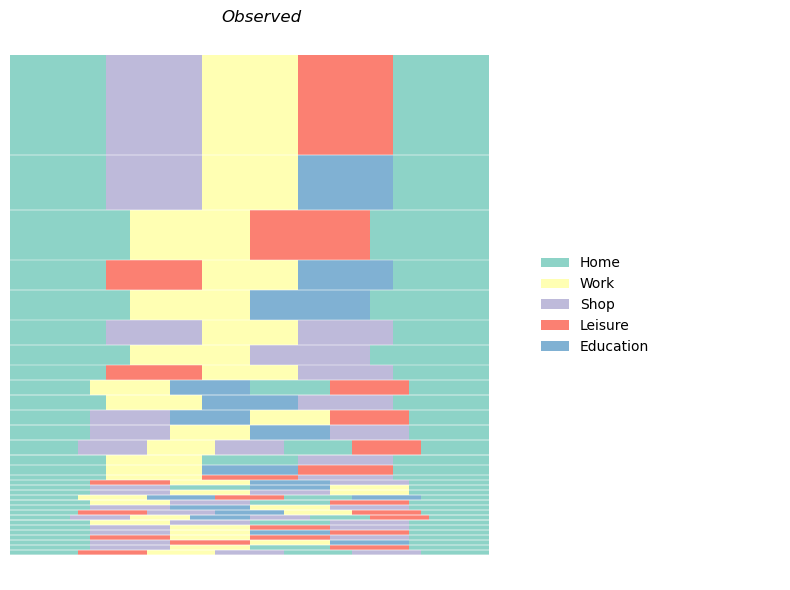

In [11]:
_ = sequence_prob_plot(population, ys={}, figsize=(8, 6))